## Problem Statement

Music genre classification is a widely explored topic, especially relevant in today's digital age where miillions of users are streaming music through various platforms such as iTunes, Spotify, YouTube, and etc.

For my capstone project, I decided to explore the world of music genre classification through the lens of machine learning. **More specifically, I want to see if I can apply appropriate machine learning modeling techniques to classify music genres with high level of accuracy.**

High level approach:
- Using Librosa, a widely used module for audio data processing, extract important features such as tempo, CENS, MFCC, spectral centroids, spectral contrast, spectral rolloff, and zero crossing rate. Then, perform some level of feature engineering and then use these features to feed classic classification models such as logistic regression, KNN, random forest, and etc.

- Upon research, another angle to consider is to apply deep learning algorithm, especially convolutional neural net. The reason for this is because audio can be represented in an 2D image (mel-spectogram and/or MFCCs). Research has shown that CNN technique has proven to be highly effective. To test this theory, plan is to create images of audio samples and feed into CNN.

Data:
- http://marsyas.info/downloads/datasets.html
- GTZAN Genre Collection is widely referenced data source, mostly famous as this dataset was used for the well known research paper "Musical gnere classification of audio signals" by George Tzanetakis and P. Cook back in 2002.

- Dataset consists of 1000 audio tracks, each 30 seconds long, 10 genres (each 100 tracks).

Goal:
- Given 1000 samples of 10 different genres, precict music genre with accuracy score well above the accuracy baseline score (10% in this case since I'll be using 10 different genres in equal sample size).

## Playbook
No particular order. Just a safe space to explore and analyze to try and experiment.

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from librosa import feature
import IPython.display as ipd
from glob import glob
from sklearn.preprocessing import scale
import scipy

In [2]:
# http://marsyas.info/downloads/datasets.html
# GTZAN Genre Collection dataset contains 1000 audio tracks, each 30 seconds long.

def compile_audio_files(genre_list):
    
    compiled_list = []
    
    for genre in genre_list:
        audio_data_dir = f'./genres/{genre}/'
        audio_files = glob(audio_data_dir + '*.wav')
        compiled_list += audio_files
        
    return compiled_list

In [3]:
# Loop through each genre and add it to the compiled list

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
final_list = compile_audio_files(genres)
final_list[:20] # Showing the first 20 to save space

['./genres/blues/blues.00093.wav',
 './genres/blues/blues.00087.wav',
 './genres/blues/blues.00050.wav',
 './genres/blues/blues.00044.wav',
 './genres/blues/blues.00078.wav',
 './genres/blues/blues.00079.wav',
 './genres/blues/blues.00045.wav',
 './genres/blues/blues.00051.wav',
 './genres/blues/blues.00086.wav',
 './genres/blues/blues.00092.wav',
 './genres/blues/blues.00084.wav',
 './genres/blues/blues.00090.wav',
 './genres/blues/blues.00047.wav',
 './genres/blues/blues.00053.wav',
 './genres/blues/blues.00052.wav',
 './genres/blues/blues.00046.wav',
 './genres/blues/blues.00091.wav',
 './genres/blues/blues.00085.wav',
 './genres/blues/blues.00081.wav',
 './genres/blues/blues.00095.wav']

https://github.com/subho406/Audio-Feature-Extraction-using-Librosa/blob/master/Song%20Analysis.ipynb

Fantastic resource that explains feature extraction through Librosa

In [4]:
def feature_extraction(files):
    
    tempo_final = []
    chroma_mean_0 = []
    chroma_mean_1 = []
    chroma_mean_2 = []
    chroma_mean_3 = []
    chroma_mean_4 = []
    chroma_mean_5 = []
    chroma_mean_6 = []
    chroma_mean_7 = []
    chroma_mean_8 = []
    chroma_mean_9 = []
    chroma_mean_10 = []
    chroma_mean_11 = []
    chroma_std_0 = []
    chroma_std_1 = []
    chroma_std_2 = []
    chroma_std_3 = []
    chroma_std_4 = []
    chroma_std_5 = []
    chroma_std_6 = []
    chroma_std_7 = []
    chroma_std_8 = []
    chroma_std_9 = []
    chroma_std_10 = []
    chroma_std_11 = []
    mfccs_mean_0 = []
    mfccs_mean_1 = []
    mfccs_mean_2 = []
    mfccs_mean_3 = []
    mfccs_mean_4 = []
    mfccs_mean_5 = []
    mfccs_mean_6 = []
    mfccs_mean_7 = []
    mfccs_mean_8 = []
    mfccs_mean_9 = []
    mfccs_mean_10 = []
    mfccs_mean_11 = []
    mfccs_mean_12 = []
    mfccs_std_0 = []
    mfccs_std_1 = []
    mfccs_std_2 = []
    mfccs_std_3 = []
    mfccs_std_4 = []
    mfccs_std_5 = []
    mfccs_std_6 = []
    mfccs_std_7 = []
    mfccs_std_8 = []
    mfccs_std_9 = []
    mfccs_std_10 = []
    mfccs_std_11 = []
    mfccs_std_12 = []
    s_centroid_mean = []
    s_centroid_std = []
    s_centroid_skew = []
    s_contrast_mean = []
    s_contrast_std = []
    s_rolloff_mean = []
    s_rolloff_std = []
    s_rolloff_skew = []
    z_cr_mean = []
    z_cr_std = []
    z_cr_skew = []
    file_name = []
    
    
    # Load the audio
    for file in files:
        # y is signal (1D numpy array), sr is the sample rate
        y, sr = librosa.load(file)
        
        # Separate harmonic and percussive signals
        y_harmonic, y_percussive = librosa.effects.hpss(y)
        
        # Beat Extraction
        tempo, beat_frames = librosa.beat.beat_track(y_harmonic, sr)
        tempo_final.append(tempo)
        
        # Chroma Energy Normalized (CENS)
        chroma = librosa.feature.chroma_cens(y_harmonic, sr)
        chroma_mean_0.append(np.mean(chroma[0]))
        chroma_mean_1.append(np.mean(chroma[1]))
        chroma_mean_2.append(np.mean(chroma[2]))
        chroma_mean_3.append(np.mean(chroma[3]))
        chroma_mean_4.append(np.mean(chroma[4]))
        chroma_mean_5.append(np.mean(chroma[5]))
        chroma_mean_6.append(np.mean(chroma[6]))
        chroma_mean_7.append(np.mean(chroma[7]))
        chroma_mean_8.append(np.mean(chroma[8]))
        chroma_mean_9.append(np.mean(chroma[9]))
        chroma_mean_10.append(np.mean(chroma[10]))
        chroma_mean_11.append(np.mean(chroma[11]))
        
        chroma_std_0.append(np.std(chroma[0]))
        chroma_std_1.append(np.std(chroma[1]))
        chroma_std_2.append(np.std(chroma[2]))
        chroma_std_3.append(np.std(chroma[3]))
        chroma_std_4.append(np.std(chroma[4]))
        chroma_std_5.append(np.std(chroma[5]))
        chroma_std_6.append(np.std(chroma[6]))
        chroma_std_7.append(np.std(chroma[7]))
        chroma_std_8.append(np.std(chroma[8]))
        chroma_std_9.append(np.std(chroma[9]))
        chroma_std_10.append(np.std(chroma[10]))
        chroma_std_11.append(np.std(chroma[11]))
        
        # Mel-frequency cepstral coefficients (MFCCs)
        mfccs = librosa.feature.mfcc(y_harmonic, sr, n_mfcc=13)
        mfccs_mean_0.append(np.mean(mfccs[0]))
        mfccs_mean_1.append(np.mean(mfccs[1]))
        mfccs_mean_2.append(np.mean(mfccs[2]))
        mfccs_mean_3.append(np.mean(mfccs[3]))
        mfccs_mean_4.append(np.mean(mfccs[4]))
        mfccs_mean_5.append(np.mean(mfccs[5]))
        mfccs_mean_6.append(np.mean(mfccs[6]))
        mfccs_mean_7.append(np.mean(mfccs[7]))
        mfccs_mean_8.append(np.mean(mfccs[8]))
        mfccs_mean_9.append(np.mean(mfccs[9]))
        mfccs_mean_10.append(np.mean(mfccs[10]))
        mfccs_mean_11.append(np.mean(mfccs[11]))
        mfccs_mean_12.append(np.mean(mfccs[12]))
    
        mfccs_std_0.append(np.std(mfccs[0]))
        mfccs_std_1.append(np.std(mfccs[1]))
        mfccs_std_2.append(np.std(mfccs[2]))
        mfccs_std_3.append(np.std(mfccs[3]))
        mfccs_std_4.append(np.std(mfccs[4]))
        mfccs_std_5.append(np.std(mfccs[5]))
        mfccs_std_6.append(np.std(mfccs[6]))
        mfccs_std_7.append(np.std(mfccs[7]))
        mfccs_std_8.append(np.std(mfccs[8]))
        mfccs_std_9.append(np.std(mfccs[9]))
        mfccs_std_10.append(np.std(mfccs[10]))
        mfccs_std_11.append(np.std(mfccs[11]))
        mfccs_std_12.append(np.std(mfccs[12]))

        # Spectral Centroid
        s_centroid = librosa.feature.spectral_centroid(y, sr)
        s_centroid_mean.append(np.mean(s_centroid))
        s_centroid_std.append(np.std(s_centroid))
        s_centroid_skew.append(scipy.stats.skew(s_centroid, axis=1)[0])
        
        # Spectral Contrast
        s_contrast = librosa.feature.spectral_contrast(y_harmonic, sr)
        s_contrast_mean.append(np.mean(s_contrast))
        s_contrast_std.append(np.std(s_contrast))
        
        # Spectral Rolloff
        s_rolloff = librosa.feature.spectral_rolloff(y, sr)
        s_rolloff_mean.append(np.mean(s_rolloff))
        s_rolloff_std.append(np.std(s_rolloff))
        s_rolloff_skew.append(scipy.stats.skew(s_rolloff, axis=1)[0])
        
        # Zero Crossing Rate
        z_cr = librosa.feature.zero_crossing_rate(y_harmonic)
        z_cr_mean.append(np.mean(z_cr))
        z_cr_std.append(np.std(z_cr))
        z_cr_skew.append(scipy.stats.skew(z_cr, axis=1)[0])
        
        # Audio file
        file_name.append(file)
    
    
    feature_dict = {
        'tempo' : tempo_final,
        'chroma_mean_0' : chroma_mean_0,
        'chroma_mean_1' : chroma_mean_1,
        'chroma_mean_2' : chroma_mean_2,
        'chroma_mean_3' : chroma_mean_3,
        'chroma_mean_4' : chroma_mean_4,
        'chroma_mean_5' : chroma_mean_5,
        'chroma_mean_6' : chroma_mean_6,
        'chroma_mean_7' : chroma_mean_7,
        'chroma_mean_8' : chroma_mean_8,
        'chroma_mean_9' : chroma_mean_9,
        'chroma_mean_10' : chroma_mean_10,
        'chroma_mean_11' : chroma_mean_11,
        'chroma_std_0' : chroma_std_0,
        'chroma_std_1' : chroma_std_1,
        'chroma_std_2' : chroma_std_2,
        'chroma_std_3' : chroma_std_3,
        'chroma_std_4' : chroma_std_4,
        'chroma_std_5' : chroma_std_5,
        'chroma_std_6' : chroma_std_6,
        'chroma_std_7' : chroma_std_7,
        'chroma_std_8' : chroma_std_8,
        'chroma_std_9' : chroma_std_9,
        'chroma_std_10' : chroma_std_10,
        'chroma_std_11' : chroma_std_11,
        'mfccs_mean_0' : mfccs_mean_0,
        'mfccs_mean_1' : mfccs_mean_1,
        'mfccs_mean_2' : mfccs_mean_2,
        'mfccs_mean_3' : mfccs_mean_3,
        'mfccs_mean_4' : mfccs_mean_4,
        'mfccs_mean_5' : mfccs_mean_5,
        'mfccs_mean_6' : mfccs_mean_6,
        'mfccs_mean_7' : mfccs_mean_7,
        'mfccs_mean_8' : mfccs_mean_8,
        'mfccs_mean_9' : mfccs_mean_9,
        'mfccs_mean_10' : mfccs_mean_10,
        'mfccs_mean_11' : mfccs_mean_11,
        'mfccs_mean_12' : mfccs_mean_12,
        'mfccs_std_0' : mfccs_std_0,
        'mfccs_std_1' : mfccs_std_1,
        'mfccs_std_2' : mfccs_std_2,
        'mfccs_std_3' : mfccs_std_3,
        'mfccs_std_4' : mfccs_std_4,
        'mfccs_std_5' : mfccs_std_5,
        'mfccs_std_6' : mfccs_std_6,
        'mfccs_std_7' : mfccs_std_7,
        'mfccs_std_8' : mfccs_std_8,
        'mfccs_std_9' : mfccs_std_9,
        'mfccs_std_10' : mfccs_std_10,
        'mfccs_std_11' : mfccs_std_11,
        'mfccs_std_12' : mfccs_std_12,
        's_centroid_mean' : s_centroid_mean,
        's_centroid_std' : s_centroid_std,
        's_centroid_skew' : s_centroid_skew,
        's_contrast_mean' : s_contrast_mean,
        's_contrast_std' : s_contrast_std,
        's_rolloff_mean' : s_rolloff_mean,
        's_rolloff_std' : s_rolloff_std,
        's_rolloff_skew' : s_rolloff_skew,
        'z_cr_mean' : z_cr_mean,
        'z_cr_std' : z_cr_std,
        'z_cr_skew' : z_cr_skew,
        'file_name' : file_name
        }
        
    return pd.DataFrame(feature_dict)

In [293]:
test_df = feature_extraction(['./genres/blues/blues.00093.wav'])

In [294]:
test_df

,tempo,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,...,s_centroid_skew,s_contrast_mean,s_contrast_std,s_rolloff_mean,s_rolloff_std,s_rolloff_skew,z_cr_mean,z_cr_std,z_cr_skew,file_name
0,143.554688,0.063791,0.055564,0.056327,0.118907,0.424171,0.034112,0.212849,0.030054,0.14953,...,7.418132,25.451396,6.383092,927.65139,705.168708,6.217031,0.020159,0.009883,1.431762,./genres/blues/blues.00093.wav


In [295]:
final_df = feature_extraction(final_list)

In [297]:
final_df.describe()

,tempo,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,...,s_centroid_std,s_centroid_skew,s_contrast_mean,s_contrast_std,s_rolloff_mean,s_rolloff_std,s_rolloff_skew,z_cr_mean,z_cr_std,z_cr_skew
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,122.438671,0.231559,0.198893,0.234094,0.199882,0.232737,0.220368,0.209292,0.257384,0.224988,...,631.641179,0.898432,24.009569,7.035084,4571.549304,1264.656250,0.314787,0.078118,0.034847,1.037310
std,28.447295,0.103748,0.095626,0.109292,0.101576,0.103861,0.105675,0.098628,0.105335,0.105489,...,266.067262,0.675915,2.630085,1.649902,1574.791602,495.211922,0.786737,0.033649,0.017099,0.804584
min,39.151278,0.007150,0.004073,0.007804,0.001019,0.004138,0.016006,0.002986,0.007480,0.002737,...,88.945216,-1.229784,16.155688,3.810239,749.140636,121.186297,-2.285210,0.012361,0.006922,-1.246983
25%,103.359375,0.159347,0.134059,0.160818,0.126797,0.159656,0.141822,0.136752,0.185163,0.148065,...,429.360606,0.478885,22.133199,5.753872,3380.069642,879.051311,-0.143165,0.052625,0.023489,0.496886
50%,117.453835,0.226326,0.190277,0.221298,0.190267,0.222951,0.214307,0.198610,0.250959,0.220715,...,581.795581,0.819435,23.819384,6.631647,4658.524473,1214.954591,0.295259,0.074203,0.031341,0.919751
75%,135.999178,0.300308,0.254667,0.298683,0.261214,0.297451,0.283598,0.269606,0.326974,0.290832,...,782.398157,1.225195,25.689970,8.231116,5533.810460,1598.517423,0.686909,0.098226,0.041115,1.402686
max,258.398438,0.609475,0.697539,0.735442,0.604490,0.640573,0.630532,0.644477,0.586001,0.615681,...,1742.654028,7.418132,31.761789,12.512996,8677.672688,2942.940788,6.217031,0.291536,0.145699,5.006928


In [119]:
# Function that labels genres since genre is contained in the file name itself

def genre_name(file):
    if 'blues' in file:
        return 'blues'
    elif 'classical' in file:
        return 'classical'
    elif 'country' in file:
        return 'country'
    elif 'disco' in file:
        return 'disco'
    elif 'hiphop' in file:
        return 'hiphop'
    elif 'jazz' in file:
        return 'jazz'
    elif 'metal' in file:
        return 'metal'
    elif 'pop' in file:
        return 'pop'
    elif 'reggae' in file:
        return 'reggae'
    elif 'rock' in file:
        return 'rock'

In [298]:
# Apply the function above to map genre

final_df['genre'] = final_df['file_name'].apply(genre_name)

In [120]:
# Dictionary that categorizes genres in numbers.
# Not ordinal values. Simply for classification purposes.

genre_num_dict = {
    'blues' : 0,
    'classical' : 1,
    'country' : 2,
    'disco' : 3,
    'hiphop' : 4,
    'jazz' : 5,
    'metal' : 6,
    'pop' : 7,
    'reggae' : 8,
    'rock' : 9
}

In [300]:
# Apply the mapping above to numerize genre

final_df['genre_num'] = final_df['genre'].map(genre_num_dict)

In [301]:
final_df.head()

,tempo,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,...,s_contrast_std,s_rolloff_mean,s_rolloff_std,s_rolloff_skew,z_cr_mean,z_cr_std,z_cr_skew,file_name,genre,genre_num
0,143.554688,0.063791,0.055564,0.056327,0.118907,0.424171,0.034112,0.212849,0.030054,0.149530,...,6.383092,927.651390,705.168708,6.217031,0.020159,0.009883,1.431762,./genres/blues/blues.00093.wav,blues,0
1,172.265625,0.277434,0.431968,0.155263,0.188732,0.169002,0.248704,0.249446,0.108724,0.223708,...,7.397029,3082.803607,1481.811552,0.651857,0.033655,0.019449,1.866563,./genres/blues/blues.00087.wav,blues,0
2,135.999178,0.226694,0.213731,0.228384,0.270766,0.344654,0.239348,0.308713,0.158992,0.168484,...,8.682703,4174.593628,899.048142,0.001096,0.070132,0.032947,0.951797,./genres/blues/blues.00050.wav,blues,0
3,135.999178,0.196588,0.267211,0.309316,0.399083,0.161947,0.129428,0.130272,0.209418,0.306650,...,9.055918,5198.594860,754.756161,0.202230,0.072635,0.023043,0.862730,./genres/blues/blues.00044.wav,blues,0
4,123.046875,0.135050,0.321793,0.240601,0.354072,0.173473,0.214172,0.279239,0.353443,0.303273,...,10.284561,4942.594552,693.969775,-0.206860,0.106374,0.019811,0.152687,./genres/blues/blues.00078.wav,blues,0


In [302]:
# Saving the dataframe as csv

final_df.to_csv('./data/final_data.csv', index=False)

## Data Exploration

In [9]:
# Load the audio

audio_data = './genres/blues/blues.00093.wav'
y, sr = librosa.load(audio_data)

In [10]:
# Listen to the audio

ipd.Audio(audio_data)

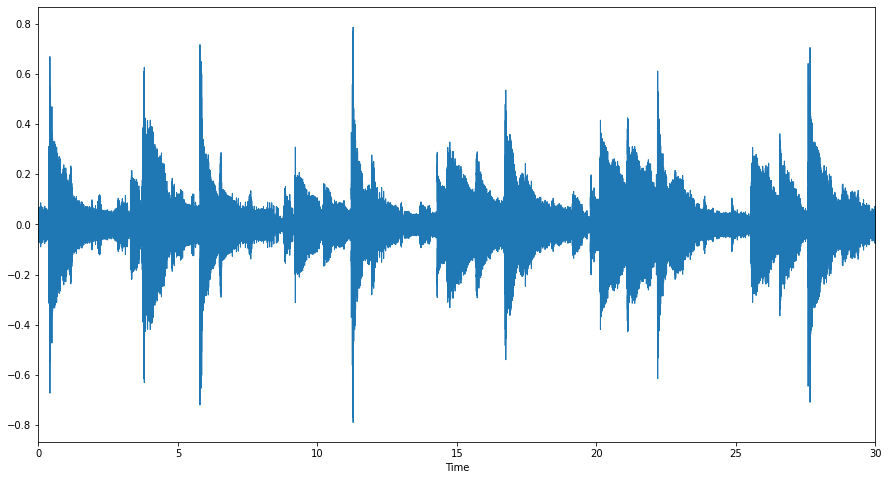

In [11]:
plt.figure(figsize=(15,8))
librosa.display.waveplot(y, sr);

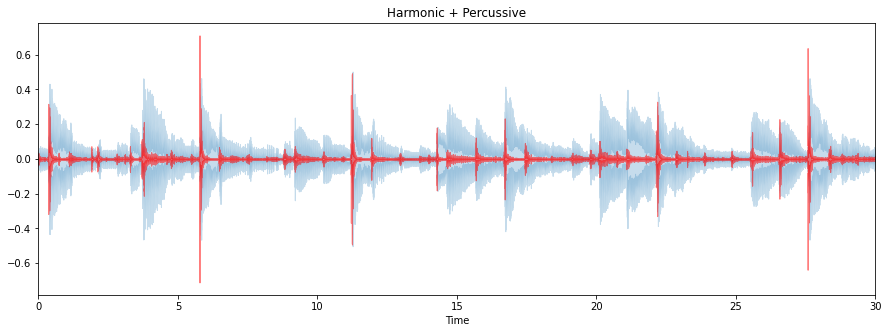

In [12]:
# Separation of harmonic and percussive signals

y_harmonic, y_percussive = librosa.effects.hpss(y)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveplot(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive');

In [231]:
mfcc_test = librosa.feature.mfcc(y, sr, n_mfcc=13)

In [268]:
rolloff_test = librosa.feature.spectral_rolloff(y, sr)

In [269]:
rolloff_test

array([[1475.02441406,  742.89550781,  333.76464844, ..., 1291.9921875 ,
        1216.62597656, 1313.52539062]])

In [249]:
np.mean(mfcc_test[6])

7.864568

In [52]:
# Audio info

print(f'Audio Sampling Rate: {sr} samples/sec')
print(f'Total Samples: {np.size(y)}')
print(f'Audio Length: {np.size(y)/sr} seconds')

Audio Sampling Rate: 22050 samples/sec
Total Samples: 661504
Audio Length: 30.00018140589569 seconds


Detected Tempo: 95.703125 beats/min


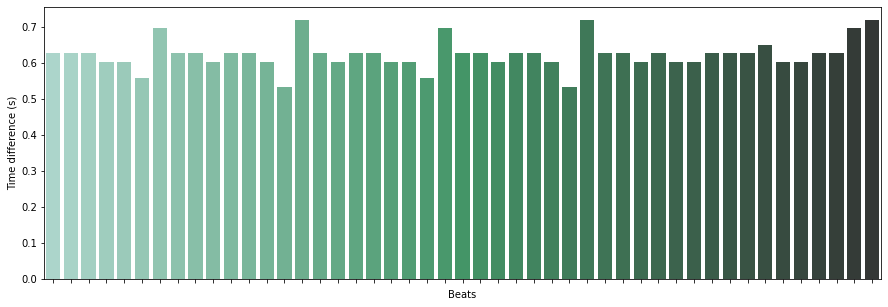

In [107]:
## Beat Extraction

tempo, beat_frames = librosa.beat.beat_track(y=y_harmonic, sr=sr)
print('Detected Tempo: '+str(tempo)+ ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff=np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")
g=sns.barplot(x=beat_nums, y=beat_time_diff, palette="BuGn_d",ax=ax)
g=g.set(xticklabels=[]);

## Chroma

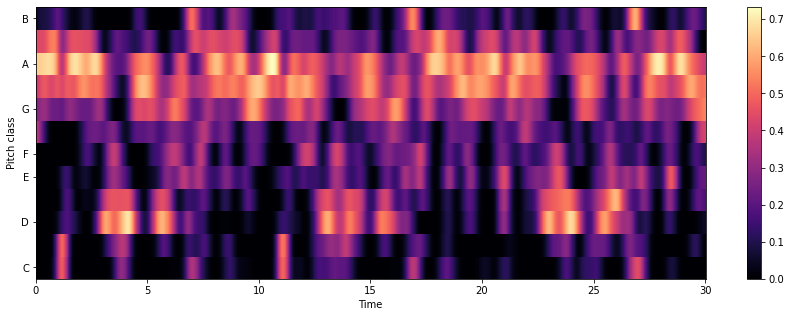

In [84]:
# Chroma Energy Normalized
# 12 element representation of the chroma energy throughout the song

chroma=librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma,y_axis='chroma', x_axis='time')
plt.colorbar();

## MFCC

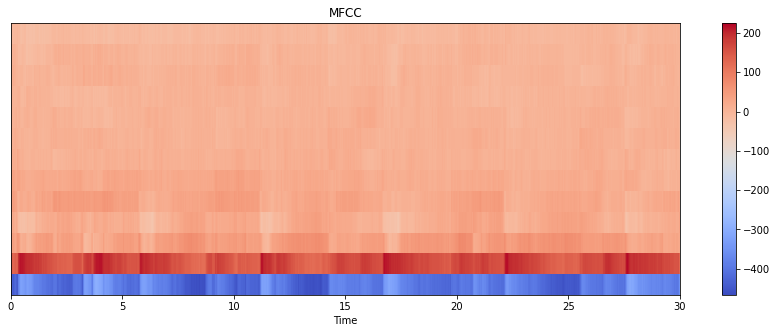

In [194]:
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=13)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC');

<AxesSubplot:title={'center':'SD MFCCs'}>

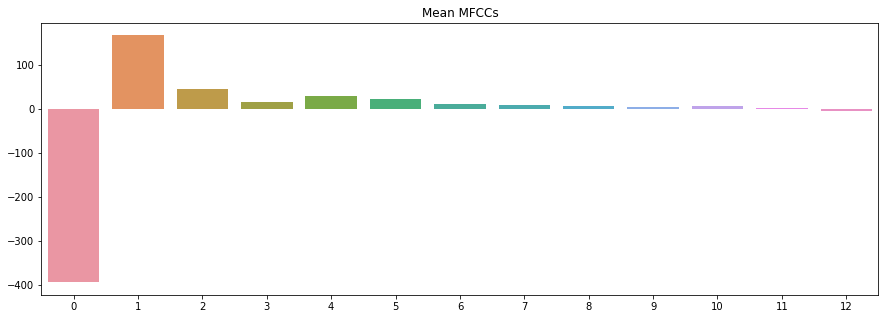

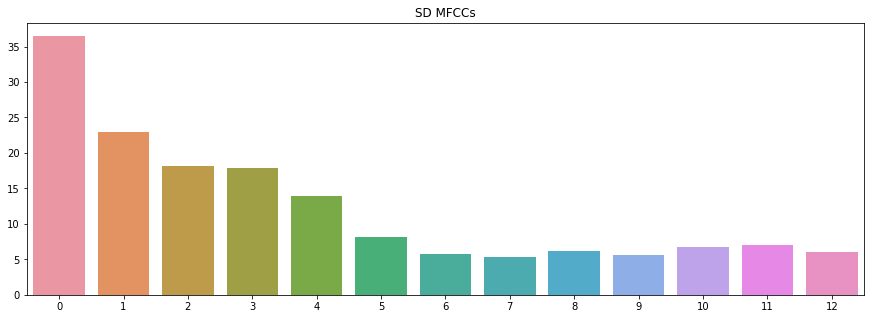

In [303]:
mfccs_mean=np.mean(mfccs,axis=1)
mfccs_std=np.std(mfccs,axis=1)

coeffs=np.arange(0,13)
plt.figure(figsize=(15,5))
plt.title('Mean MFCCs')
sns.barplot(x=coeffs,y=mfccs_mean)

plt.figure(figsize=(15,5))
plt.title('SD MFCCs')
sns.barplot(x=coeffs,y=mfccs_std);

Detected Tempo: 143.5546875 beats/min


/Users/young_park/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


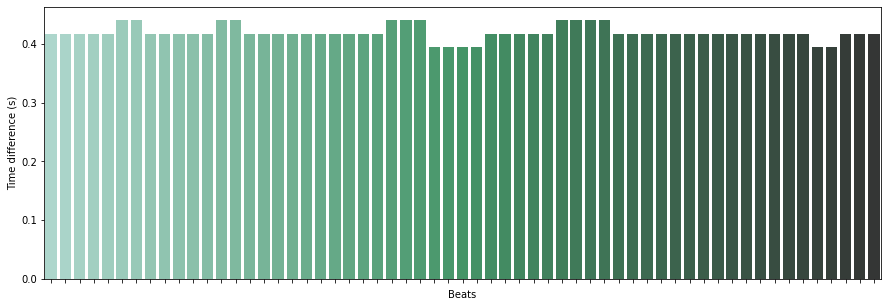

In [304]:
tempo, beat_frames = librosa.beat.beat_track(y=y_harmonic, sr=sr)
print('Detected Tempo: '+str(tempo)+ ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff=np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")
g=sns.barplot(beat_nums, beat_time_diff, palette="BuGn_d",ax=ax)
g=g.set(xticklabels=[]);

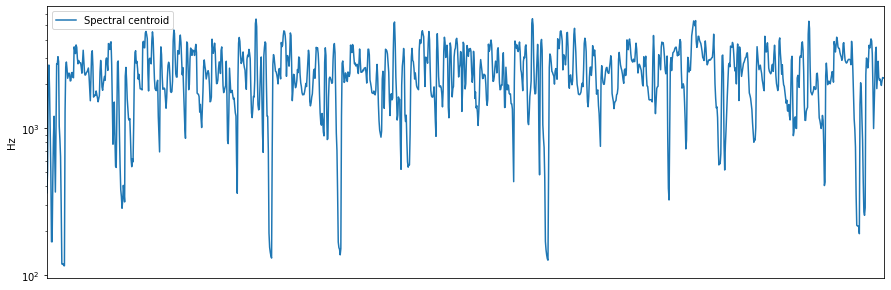

In [87]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend();

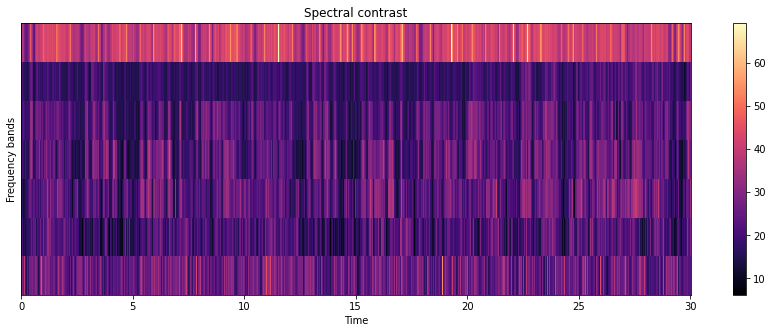

In [88]:
contrast=librosa.feature.spectral_contrast(y=y_harmonic,sr=sr)
plt.figure(figsize=(15,5))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast');

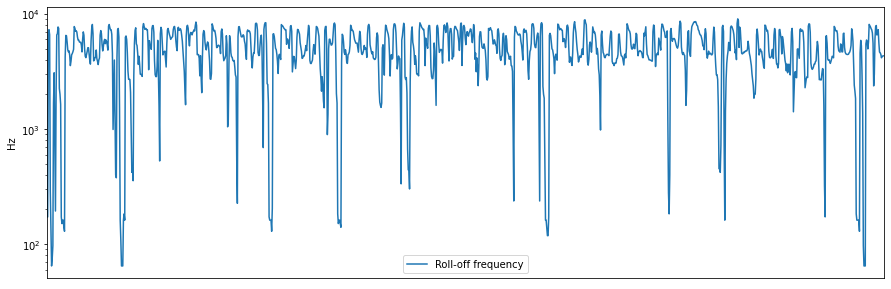

In [89]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend();

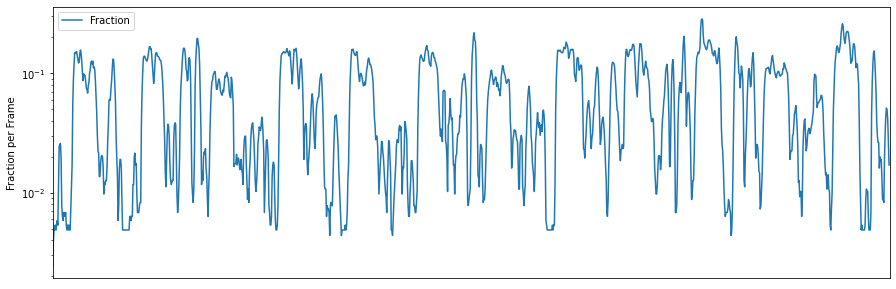

In [90]:
zrate=librosa.feature.zero_crossing_rate(y_harmonic)
plt.figure(figsize=(15,5))
plt.semilogy(zrate.T, label='Fraction')
plt.ylabel('Fraction per Frame')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend();

In [ ]:
stft = librosa.stft(y, n_fft = 2048, hop_length = 512)